In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
system_sizes = np.load('data/system_sizes.npy')
bond_dims = np.load('data/system_sizes.npy')

In [26]:
tr_set_sizes = np.linspace(2e3,2e4,20)
threshold=.95

In [4]:
fidelities_scaling_L = np.load('data/rand_fidelities_scaling_L_D=2.npy')
fidelities_scaling_D = np.load('data/rand_fidelities_scaling_D_L=4.npy')

In [22]:
nseed=fidelities_scaling_L.shape[-1]

In [7]:
%matplotlib inline

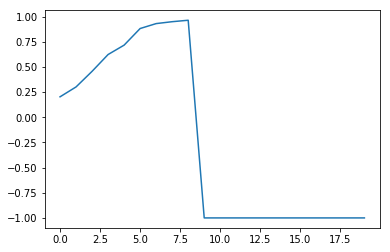

In [46]:
plt.plot(fidelities_scaling_D[-1, :, 0])

In [11]:
f = fidelities_scaling_L[0, :,0]

In [13]:
c = np.polyfit(tr_set_sizes, f,1)

In [14]:
c

array([-7.55452701e-05,  1.12058539e-01])

In [30]:
def get_N_for_threshold(f, threshold):
    f = f[f>0]
    try:
        iabove = np.where(f>threshold)[0][0]
    
        return int(tr_set_sizes[iabove])
    except IndexError:
        return -1
    

In [31]:
Nthresh_scaling_L = np.empty((len(system_sizes),nseed))
Nthresh_scaling_D= np.empty((len(bond_dims),nseed))


In [32]:
for i in range(nseed):
    for il in range(len(system_sizes)):
        Nthresh_scaling_L[il, i] = get_N_for_threshold(fidelities_scaling_L[il, :, i],threshold)
    for iD in range(len(bond_dims)):
        Nthresh_scaling_D[iD, i] = get_N_for_threshold(fidelities_scaling_D[iD, :, i],threshold)

In [33]:
Nthresh_scaling_L

array([[3894., 4842., 6736., 5789., 5789.],
       [3894., 3894., 4842., 4842., 4842.],
       [4842., 6736., 5789., 5789., 6736.],
       [8631., 6736., 6736., 6736., 7684.]])

In [34]:
Nthresh_scaling_D

array([[ 3.8940e+03,  4.8420e+03,  6.7360e+03,  5.7890e+03,  5.7890e+03],
       [ 5.7890e+03,  5.7890e+03,  8.6310e+03,  6.7360e+03,  8.6310e+03],
       [ 3.8940e+03,  7.6840e+03,  9.5780e+03,  7.6840e+03,  7.6840e+03],
       [ 5.7890e+03,  6.7360e+03,  1.0526e+04,  7.6840e+03, -1.0000e+00]])

In [40]:
NL = len(system_sizes)
ND = len(bond_dims)

In [37]:
N_L_mean =np.empty(len(system_sizes))
N_L_std =np.empty(len(system_sizes))
for i in range(len(system_sizes)):
    N =Nthresh_scaling_L[i, :]
    N_L_mean[i] = np.mean(N[N>0])
    N_L_std[i] = np.std(N[N>0])

In [41]:
N_D_mean =np.empty(ND)
N_D_std =np.empty(ND)
for i in range(ND):
    N =Nthresh_scaling_D[i, :]
    N_D_mean[i] = np.mean(N[N>0])
    N_D_std[i] = np.std(N[N>0])

<Container object of 3 artists>

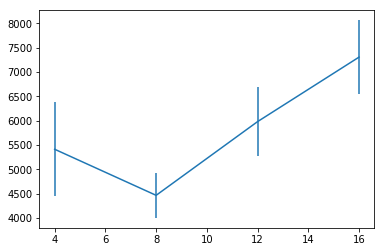

In [39]:
fig, ax = plt.subplots()
plt.errorbar(system_sizes, N_L_mean, yerr=N_L_std)

<Container object of 3 artists>

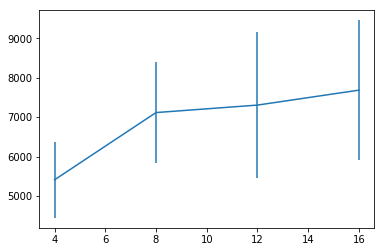

In [42]:
fig, ax = plt.subplots()
plt.errorbar(bond_dims, N_D_mean, yerr=N_D_std)